# Linear Regression with SciKit-Learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Data/Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

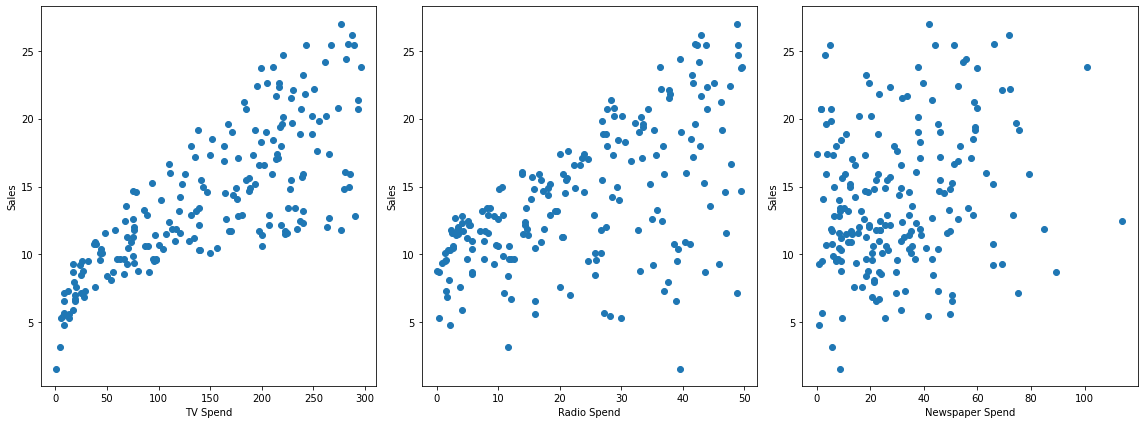

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout();

-----

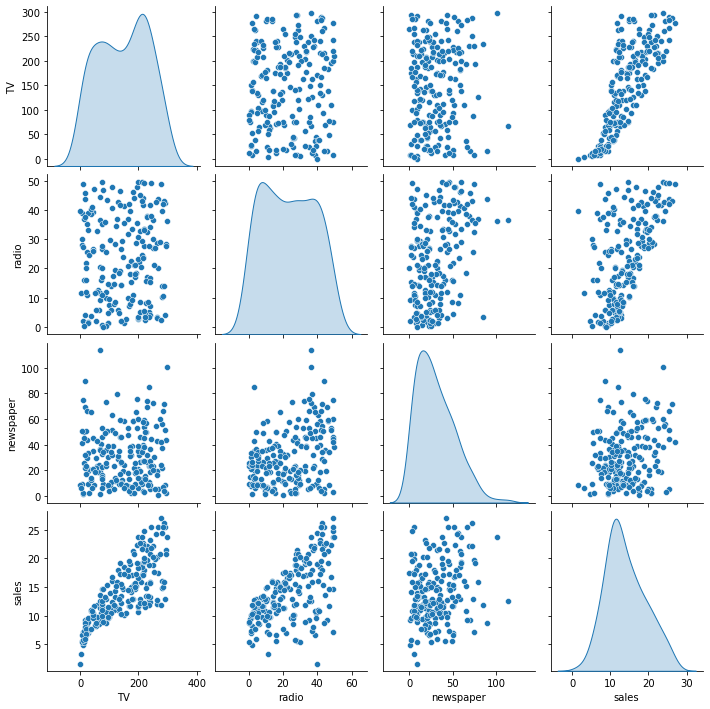

In [12]:
# Relationships between features
sns.pairplot(df, diag_kind='kde');

-----

# SciKit Learn

In [15]:
# seperate features and labels
X = df.drop('sales', axis=1)
y = df['sales']

# Train | Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
len(df)

200

In [21]:
X_train.shape

(140, 3)

# Creating a Model (Estimator)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
# help(LinearRegression)

In [25]:
lr = LinearRegression()

## Fit/Train the Model on the training data

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
test_predictions = lr.predict(X_test)

### Evaluation on the Test Set

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

# Calculate Performance on Test Set

In [34]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
# mean absolute error
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

Now we now that our mean absolute error is around 1.214. but is it good enough? we can get the general idea by comparing it to the mean value of our sales data which is 14.0225. So our error is around 8.6%.

### It is important to look at both MAE and RMSE values.
- MAE for to know whether our model is working well on average
- RMSE to make sure our model is not super far off for just a few data points.

Example: if you have good MAE, your model is performing well. But Horrible RMSE means your model have a few data points where you are way off.

In [42]:
# root mean squared error (RMSE)
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882

In [39]:
df['sales'].mean()

14.0225

## Residuals
$$y-\hat{y}$$

In [63]:
test_residuals = y_test - test_predictions

In [64]:
# test_residuals

## Plotting Residuals

Plotting residuals with actual y values should be random scatterplot. It should be **random**

**There shouldn't be any clear pattern.** If there is a pattern that means Linear Regression may not be a a good model for this dataset.

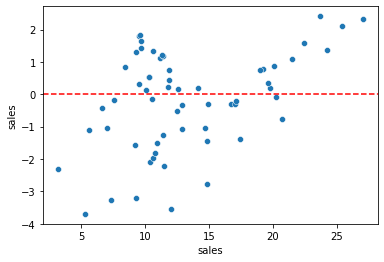

In [53]:
# comparing residuals with acutal y values
sns.scatterplot(x=y_test, y=test_residuals);
plt.axhline(y=0, color='red', ls='--');

For residual distribution plot, we want **normally distributed plot.**

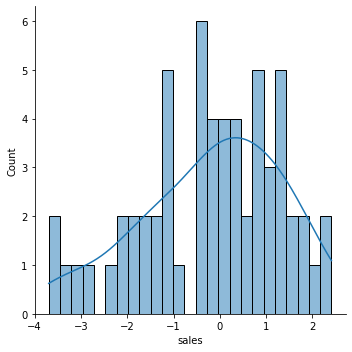

In [57]:
sns.displot(x=test_residuals, bins=25, kde=True);

Another way of checking the comparison of residuals and normally distribution line is as below.
- redline is normal distribution line
- blue points are residuals
- we would want blue points to be aligned with red line (meaning residuals to be normally distributed) If there is too much way off, we will know there is something wrong with the dataset.

In [58]:
import scipy as sp

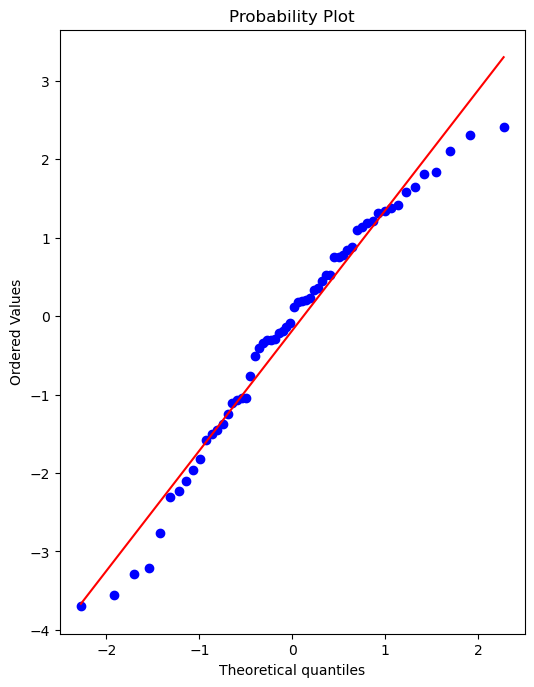

In [62]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

----

# Deployment, Predictions, and Model Attributes

## Final Model Fit

In [65]:
final_model = LinearRegression()

In [66]:
final_model.fit(X, y)

LinearRegression()

### Coefficients
- this returns beat coefficents for each features in same order (TV, radio, newspaper) , eg TV: 0.04576465

In [69]:
# checking beta Coefficients
# this returns beat coefficents for each features in same order (TV, radio, newspaper) , eg TV: 0.04576465
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [71]:
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


### how to read coefficient?

From the coefficients, we can intuitally tell whether spending money for each channel make sense or not. 
- For instance, newspaper column returns almost 0 (-0.00103749) where model think there is almost no boosting of sales.
- If you hold Radio and newspaper spending fixed and we increase 1 unit for TV. Then we can expect to increase 0.04576465 sales for every unit of 1 TV spend because of positive correlation.

### Interpreting the coefficients: (IMPORTANT: features needs to be in same unit)

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----


* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---

# Model Persistence (Saving and Loading a Model)

In [81]:
from joblib import dump, load

In [82]:
dump(final_model, 'Models/mdl_lr_sales.pkl')

['Models/mdl_lr_sales.pkl']

In [83]:
loaded_model = load( 'Models/mdl_lr_sales.pkl')

In [84]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

## Prediction on New Data

#### Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?

In [85]:
campaign = [[149,22,12]]

In [86]:
loaded_model.predict(campaign)

array([13.893032])